In [70]:
import pandas as pd
import numpy as np
dat = r"C:\Users\steph\Downloads\encoded_df.csv"
df = pd.read_csv(dat)

# Split data

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
headers = list(df.columns)
exc= ['id', 'relDate']
print(headers)
ind_var= [x for x in headers if x not in exc]
print(ind_var)
dep_var = ["rating"]
x = df[ind_var]
y = df[dep_var]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

['id', 'date', 'minute', 'rating', 'relDate', 'relCountry_Argentina', 'relCountry_Australia', 'relCountry_Brazil', 'relCountry_Canada', 'relCountry_China', 'relCountry_Czechia', 'relCountry_Denmark', 'relCountry_France', 'relCountry_Germany', 'relCountry_Greece', 'relCountry_Hong Kong', 'relCountry_India', 'relCountry_Italy', 'relCountry_Japan', 'relCountry_Mexico', 'relCountry_Netherlands', 'relCountry_Philippines', 'relCountry_Poland', 'relCountry_Portugal', 'relCountry_Russian Federation', 'relCountry_South Korea', 'relCountry_Spain', 'relCountry_Sweden', 'relCountry_Switzerland', 'relCountry_Turkey', 'relCountry_UK', 'relCountry_USA', 'type_Digital', 'type_Premiere', 'type_TV', 'type_Theatrical', 'type_Theatrical limited', 'studio_20th Century Fox', 'studio_ARD', 'studio_ARTE', 'studio_ARTE France Cinéma', 'studio_American Mutoscope & Biograph', 'studio_BBC', 'studio_BFI', 'studio_BR', 'studio_CNC', 'studio_Canal+', 'studio_Channel 4 Television', 'studio_Columbia Pictures', 'studio

## Model Linear Regression

In [72]:

model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)
pred = model.predict(x_test)
print(pred)
df_test =x_test
df_test["predictions_linear"]=pred
df_test["actual"]= y_test["rating"]
print(x_test['predictions_linear'])
print(type(x_val))


Coefficients: [[-3.07200428e-18 -6.93889390e-18  1.00000000e+00  3.25295346e-14
  -5.60662627e-15 -7.73339726e-15 -1.94289029e-16  2.65065747e-14
   7.87564458e-15  3.38618023e-15  1.66533454e-16  1.99840144e-15
   5.44009282e-15 -6.43929354e-15  6.78623824e-15  3.10862447e-15
  -3.64291930e-16 -1.67192649e-14 -4.71844785e-15 -1.58887660e-14
  -3.85316778e-14 -1.57165947e-15  1.99840144e-15  3.63598041e-15
   3.86496390e-15 -6.05071548e-15 -1.13763166e-14  2.31342723e-14
   2.47024623e-15  2.83453816e-15 -1.67921232e-15  6.93889390e-16
   2.26207941e-15  3.02535774e-15  6.80011603e-16 -1.77080572e-14
  -3.22485094e-15 -1.61225200e-14 -3.06525638e-14 -3.24011651e-14
  -2.72351586e-14  6.04377659e-15  9.70057368e-15 -3.13360449e-14
  -2.25514052e-14 -2.86090596e-14 -2.30857000e-14 -3.39901718e-14
   3.63771513e-14 -3.26128013e-14 -5.80993587e-14 -2.31759056e-14
   4.61852778e-14  1.06858966e-14 -3.67188918e-14 -1.91270610e-14
   2.64510636e-14 -5.48259355e-14 -2.05252482e-14 -3.70536934e

# Continuous Metrics

In [73]:
def mse(actual,predicted):
    return np.mean((df_test[actual]-df_test[predicted])**2)
    

In [74]:
print(mse("actual" ,"predictions_linear"))

6.956194333237625e-28


In [75]:
def mae(actual,predicted):
    return (abs(df_test[actual]-df_test[predicted])).mean()
    

In [76]:
print(mae("actual","predictions_linear"))

1.7424730207896268e-14


# Binary metrics
we need to determine how we will convert rating and predicted rating to binary.

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score
def precision(actual,predicted):
    return precision_score(df[actual],df[predicted])
def recall(actual,predicted):
    return recall_score(df[actual],df[predicted])
def f1(actual,predicted):
    return f1_score(df[actual],df[predicted])

In [78]:
from sklearn.metrics import confusion_matrix
def lift(actual, predicted):
    tn,fp,fn,tp = confusion_matrix(df[actual],df[predicted]).ravel()
    return (tp/(tp+fp))/((tp+fn)/(tp+tn+fp+fn))
    

# Graphs

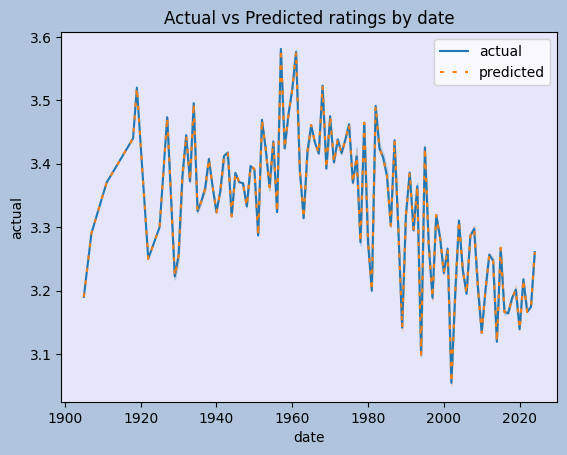

dotted line for predictions due to overlap


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'date', y ='actual', label = 'actual', errorbar=('ci', 0))
sns.lineplot(data =df_test, x = 'date', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0), dashes=[2,4])
plt.title("Actual vs Predicted ratings by date")
plt.show()
print("dotted line for predictions due to overlap")

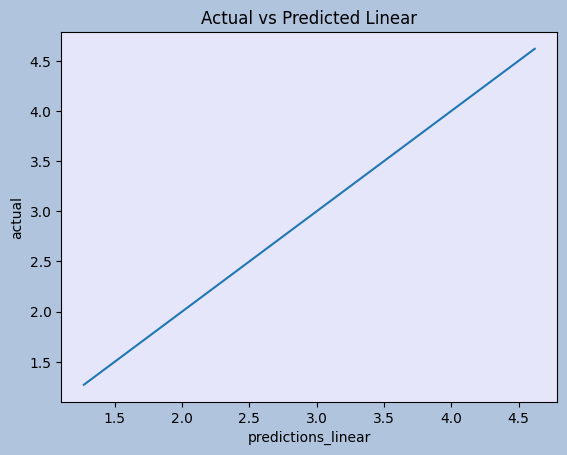

In [80]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
plt.title("Actual vs Predicted Linear")
sns.lineplot(data =df_test, x = 'predictions_linear', y ='actual', errorbar=('ci', 0))
plt.show()

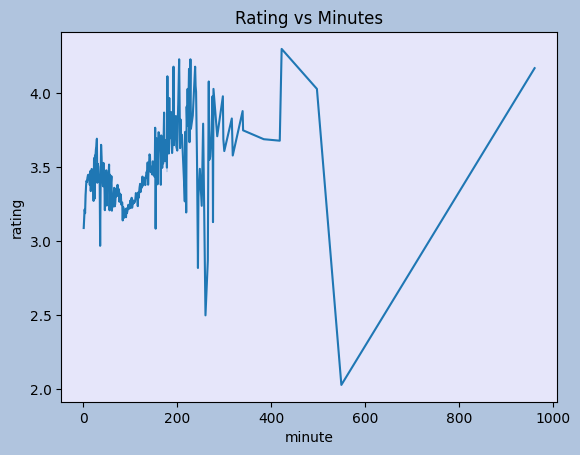

In [81]:

plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df, x = 'minute', y ='rating',errorbar=('ci', 0))
plt.title("Rating vs Minutes")
plt.show()
